### Regressioni Lineari
**partiamo con un esempio**    
      
Supponiamo volessimo stimare il fatturato dei prossimi mesi in base a quanto viene investito in campagne di marketing.    
      
E' intuitivo pensare che investitre in strategie di marketing possa portare ad incrementi del fatturato ma, utilizzando i dati a nostra disposizione, vogliamo *misurare* quanto effettivamente è l'incremento di fatturato.     
      
      
Supponiamo di aver già testato 4 diverse campagne di marketing.    
Come possiamo sfruttare i dati raccolti per prevedere i benefici di un nuovo investimento di, ad esempio 5000€ e di un investimento di 25000€ ?      
       
Iniziamo visualizzando i dati a nostra disposizione:

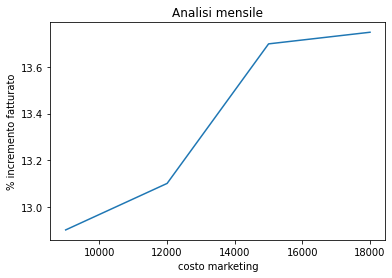

In [1]:
import matplotlib.pyplot as plt
import numpy as np

costo_campagna_marketing = np.array([9000, 12000, 15000, 18000])
incremento_percentuale_fatturato_mensile = np.array([12.9, 13.1, 13.7, 13.75])

plt.plot(costo_campagna_marketing, incremento_percentuale_fatturato_mensile)
plt.title('Analisi mensile')
plt.xlabel("costo marketing")
plt.ylabel("% incremento fatturato")
plt.show()

### Regressione Lineare
La regressione lineare è una tipologia di **apprendimento supervisionato**, utile per stimare l'andamento di un fenomeno approssimandone il comportamento alla retta che meglio lo rappresenta.    
       
$$
Y = m X + c
$$
      
Supponiamo **m = 0.00016** e **c = 11.1**

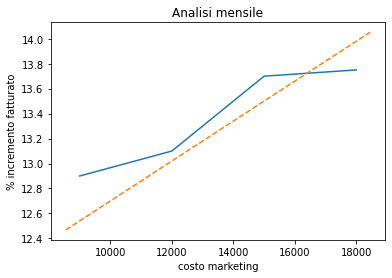

In [2]:
import numpy as np

plt.plot(costo_campagna_marketing, incremento_percentuale_fatturato_mensile)
plt.title('Analisi mensile')
plt.xlabel("costo marketing")
plt.ylabel("% incremento fatturato")

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 11.1 + .00016 * x_vals
plt.plot(x_vals, y_vals, '--')

plt.show()

Come fare per misurare quanto è buona la nostra ipotesi _( m=0.00016 e c=11.1 )_ rispetto a qualsiasi altra?    
Come fare per trovare la migliore coppia di coefficienti **m** e **c**?      
       
Per poterlo raffrontare con altri abbiamo bisogno di un modo per calcolare l'errore del nostro modello.     
     
$$
MSE = \frac{\sum ( ipotesi - reale ) ^2}{m}
$$
     
La funzione MSE effettua una media tra i risultati delle ipotesi del modello rispetto ai valori riscontrati nella realtà.

In [3]:
y = costo_campagna_marketing * 0.00016 + 11.1

print('output modello', y)
print('valori reali  ', incremento_percentuale_fatturato_mensile)

output modello [12.54 13.02 13.5  13.98]
valori reali   [12.9  13.1  13.7  13.75]


In [4]:
mse = ((y - incremento_percentuale_fatturato_mensile)**2).mean()
print(mse)

0.0572250000000002


Ora abbiamo un modello che riesce a rappresentare i nostri dati (la retta costruita sui parametri m e c) ed un modo per calcolare la bontà del modello.      
      
Come si possono stimare al meglio i parametri che governano il nostro modello?    
     
Possiamo stimare come varia l'errore variando i parametri, cercando manualmente la combinazione migliore oppure osservare che:
- in realtà vogliamo minimizzare la funzione di errore MSE
- la funzione MSE, per come è definita, ha un minimo assoluto
    
![grafico](loss_mse.png)
     
Il modo in cui ottimizziamo i parametri della funzione di ipotesi è prendendo la derivata ( = tangente alla funzione) della funzione di errore (MSE).    
    
La pendenza del piano tangente in un punto è data dalla derivata in quel punto e fornisce la direzione su cui muoverci.    
    
Riduciamo il costo della funzione ipotesi seguendo la direzione trovata, compiendo passi determinati da un parametro α, che è chiamato «tasso di apprendimento» (learning rate).    
    
α troppo grande -> il modello potrebbe non convergere     
α troppo piccolo -> addestramento lento

### Esempio su dataset di un e-commerce
il dataset è disponibile qui: https://www.kaggle.com/srolka/ecommerce-customers

In [5]:
import pandas as pd

ds = pd.read_csv('ecomm_data.csv')

In [6]:
ds.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
ds.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


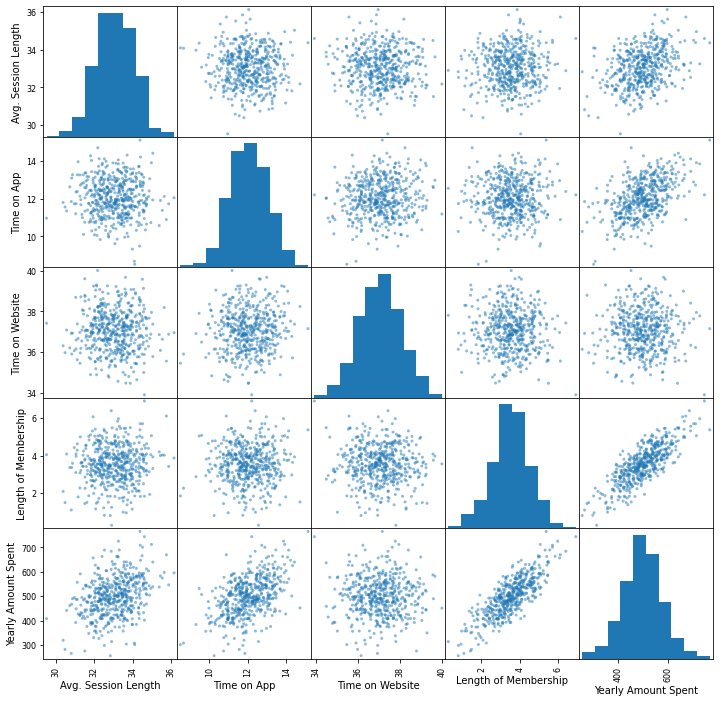

In [8]:
correlazioni = pd.plotting.scatter_matrix(ds, figsize=(12, 12))

Possiamo notare che esiste una relazione lineare tra la spesa annua degli utenti e da quanto tempo sono iscritti; anche il tempo di permanenza sull'app ha una relazione per lo più lineare con la spesa annua.     
Per utilizzare queste relazioni in un modello che preveda la spesa media annua sulla base della fedeltà degli utenti e del tempo di utilizzo dell'app, possiamo applicare una regressione lineare sfruttando la libreria Scikit-Learn.    
![scikitlearn](scikit-learn.png)
La libreria Scikit-Learn è una libreria open source di apprendimento automatico che rende facilmente disponibili i principali algoritmi di machine learning.    

In [9]:
x = ds[['Time on App', 'Length of Membership']]
y = ds['Yearly Amount Spent']

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
print('Esempi di addestramento:', len(x_train))
print('Esempi di test:', len(x_test))

Esempi di addestramento: 400
Esempi di test: 100


In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

print("Coefficienti angolari:", model.coef_)
print("Offset dall'origine", model.intercept_)

Coefficienti angolari: [38.05229762 62.74587847]
Offset dall'origine -180.71299120812324


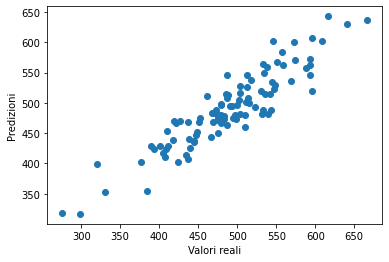

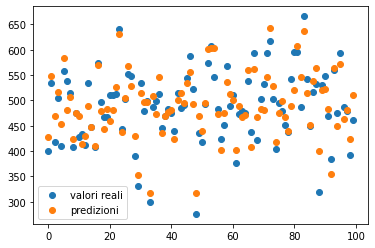

In [13]:
results = model.predict(x_test)
plt.scatter(y_test, results)
plt.xlabel("Valori reali")
plt.ylabel("Predizioni")
plt.show()

plt.scatter(range(len(x_test)), y_test, label='valori reali')
plt.scatter(range(len(x_test)), results, label='predizioni')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, max_error

print('Errore assoluto medio:', mean_absolute_error(y_test, results))
print('Errore massimo:', max_error(y_test, results))
print('Varianza:', explained_variance_score(y_test, results))

Errore assoluto medio: 23.020740305230383
Errore massimo: 79.23961867471911
Varianza: 0.8383645320846995


In [15]:
x = ds[['Time on Website', 'Avg. Session Length']]
y = ds['Yearly Amount Spent']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model.fit(x_train, y_train)

results = model.predict(x_test)

print('Errore assoluto medio:', mean_absolute_error(y_test, results))
print('Errore massimo:', max_error(y_test, results))
print('Varianza:', explained_variance_score(y_test, results))

Errore assoluto medio: 54.04135026716907
Errore massimo: 200.62398366263506
Varianza: 0.15203343888684828


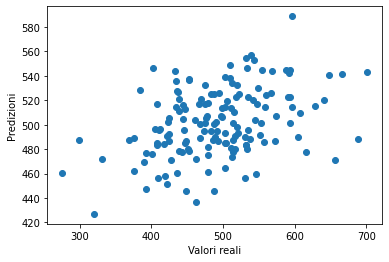

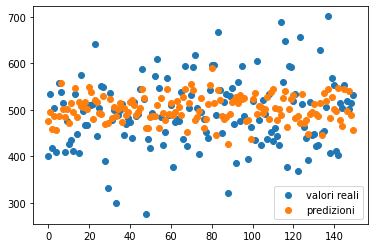

In [16]:
results = model.predict(x_test)
plt.scatter(y_test, results)
plt.xlabel("Valori reali")
plt.ylabel("Predizioni")
plt.show()

plt.scatter(range(len(x_test)), y_test, label='valori reali')
plt.scatter(range(len(x_test)), results, label='predizioni')
plt.legend()
plt.show()

Errore assoluto medio: 8.426091641432102
Errore massimo: 30.812190004543083
Varianza: 0.9812611651910702


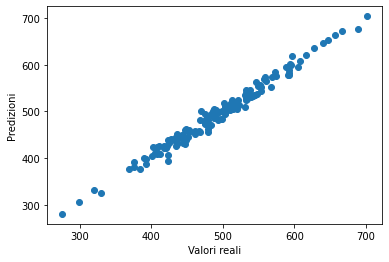

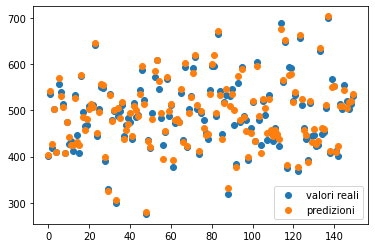

In [17]:
x = ds[['Time on App', 'Length of Membership', 'Time on Website', 'Avg. Session Length', ]]
y = ds['Yearly Amount Spent']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model.fit(x_train, y_train)

results = model.predict(x_test)

print('Errore assoluto medio:', mean_absolute_error(y_test, results))
print('Errore massimo:', max_error(y_test, results))
print('Varianza:', explained_variance_score(y_test, results))

results = model.predict(x_test)
plt.scatter(y_test, results)
plt.xlabel("Valori reali")
plt.ylabel("Predizioni")
plt.show()

plt.scatter(range(len(x_test)), y_test, label='valori reali')
plt.scatter(range(len(x_test)), results, label='predizioni')
plt.legend()
plt.show()